# Python code for venn digram with gene names

In this code I am using genes name and making venn diagram.<br>

## Venn diagram without genes name

<class 'set'>


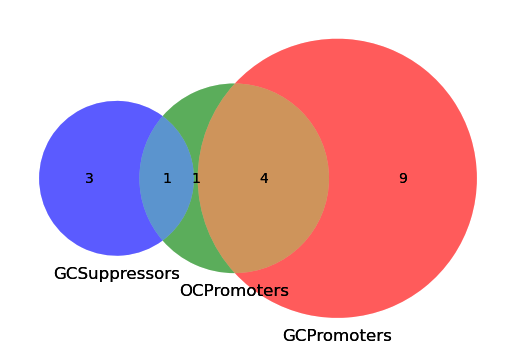

In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
Gastric_tumor_promoters = set(['DPEP1', 'CDC42BPA', 'GNG4', 'RAPGEFL1', 'MYH7B', 'SLC13A3', 'PHACTR3', 'SMPX', 'NELL2', 'PNMAL1', 'KRT23', 'PCP4', 'LOX', 'CDC42BPA'])

Ovarian_tumor_promoters = set(['ABLIM1','CDC42BPA','VSNL1','LOX','PCP4','SLC13A3'])

Gastric_tumor_suppressors = set(['PLCB4', 'VSNL1', 'TOX3', 'VAV3'])
print(type(Gastric_tumor_suppressors))
#Ovarian_tumor_suppressors = set(['VAV3', 'FREM2', 'MYH7B', 'RAPGEFL1', 'SMPX', 'TOX3'])
venn3([Gastric_tumor_promoters,Ovarian_tumor_promoters, Gastric_tumor_suppressors], ('GCPromoters', 'OCPromoters', 'GCSuppressors'))

venn3([Gastric_tumor_promoters,Ovarian_tumor_promoters, Gastric_tumor_suppressors], ('GCPromoters', 'OCPromoters', 'GCSuppressors'))
plt.show()

## Venn digram with name

Text(-20, 40, 'ABLIM1')

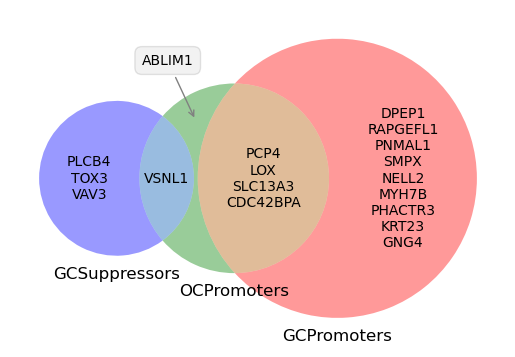

In [2]:
A = set(['DPEP1', 'CDC42BPA', 'GNG4', 'RAPGEFL1', 'MYH7B', 'SLC13A3', 'PHACTR3', 'SMPX', 'NELL2', 'PNMAL1', 'KRT23', 'PCP4', 'LOX', 'CDC42BPA'])
B = set(['ABLIM1','CDC42BPA','VSNL1','LOX','PCP4','SLC13A3'])
C = set(['PLCB4', 'VSNL1', 'TOX3', 'VAV3'])

v = venn3([A,B,C], ('GCPromoters', 'OCPromoters', 'GCSuppressors'))

v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('010').set_text('')
plt.annotate(',\n'.join(B-A-C), xy=v.get_label_by_id('010').get_position() +
             np.array([0, 0.2]), xytext=(-20,40), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))


## Venn diagram with name
This code have some issue with overlapping genes name

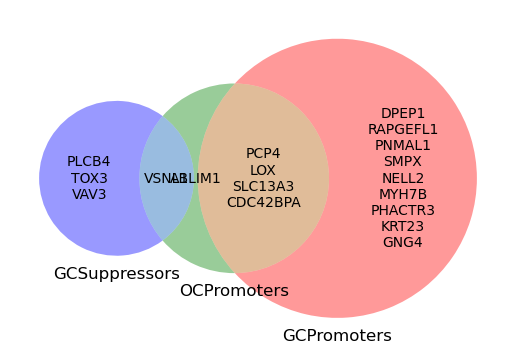

In [3]:
A = set(['DPEP1', 'CDC42BPA', 'GNG4', 'RAPGEFL1', 'MYH7B', 'SLC13A3', 'PHACTR3', 'SMPX', 'NELL2', 'PNMAL1', 'KRT23', 'PCP4', 'LOX', 'CDC42BPA'])
B = set(['ABLIM1','CDC42BPA','VSNL1','LOX','PCP4','SLC13A3'])
C = set(['PLCB4', 'VSNL1', 'TOX3', 'VAV3'])

v = venn3([A,B,C], ('GCPromoters', 'OCPromoters', 'GCSuppressors'))

v.get_label_by_id('100').set_text('\n'.join(A-B-C))
v.get_label_by_id('110').set_text('\n'.join(A&B-C))
v.get_label_by_id('011').set_text('\n'.join(B&C-A))
v.get_label_by_id('001').set_text('\n'.join(C-A-B))
v.get_label_by_id('010').set_text('\n'.join(B-A-C))

# Python code for GSEA analysis [gseapy]

In [4]:
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

In [5]:
from gseapy import Biomart
bm = Biomart()

In [6]:
queries ={'ensembl_gene_id': ['ENSG00000125285','ENSG00000182968'] } # need to be a dict object
results = bm.query(dataset='hsapiens_gene_ensembl',
                   attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                   filters=queries)
results.head()

ensembl_gene_id external_gene_name  entrezgene_id       go_id
0  ENSG00000125285              SOX21          11166  GO:0006355
1  ENSG00000125285              SOX21          11166  GO:0005634
2  ENSG00000125285              SOX21          11166  GO:0003677
3  ENSG00000125285              SOX21          11166  GO:0003700
4  ENSG00000125285              SOX21          11166  GO:0000981

# Python code for complexHeatmap in Python [PyComplexHeatmap]

## Oncoprint plot

In [7]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
#sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

In [8]:
data=pd.read_csv("/Library/Frameworks/R.framework/Versions/4.1/Resources/library/ComplexHeatmap/extdata/tcga_lung_adenocarcinoma_provisional_ras_raf_mek_jnk_signalling.txt",sep='\t',index_col=0)
data=data.iloc[:,:-1]
data=data.stack().reset_index()
data.columns=['SampleID','Genes','Variants']
data.Variants.replace({'  ':np.nan},inplace=True)

In [9]:
print(data.Variants.dropna().unique())
data.head()

['MUT;' 'AMP;' 'HOMDEL;' 'MUT;AMP;']


SampleID   Genes Variants
0  TCGA-05-4384-01    KRAS      NaN
1  TCGA-05-4384-01    HRAS      NaN
2  TCGA-05-4384-01    BRAF      NaN
3  TCGA-05-4384-01    RAF1      NaN
4  TCGA-05-4384-01  MAP3K1      NaN

In [10]:
unique_variants=[]
for var in data.Variants.dropna().unique():
    for v1 in var.split(';'):
        v1=v1.strip()
        if v1=='':
            continue
        if v1 not in unique_variants:
            unique_variants.append(v1)
print(unique_variants)
for var in unique_variants:
    data[var]=data.Variants.fillna('').apply(lambda x:1 if var in x else 0)


['MUT', 'AMP', 'HOMDEL']


In [11]:
data.head()

SampleID   Genes Variants  MUT  AMP  HOMDEL
0  TCGA-05-4384-01    KRAS      NaN    0    0       0
1  TCGA-05-4384-01    HRAS      NaN    0    0       0
2  TCGA-05-4384-01    BRAF      NaN    0    0       0
3  TCGA-05-4384-01    RAF1      NaN    0    0       0
4  TCGA-05-4384-01  MAP3K1      NaN    0    0       0

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


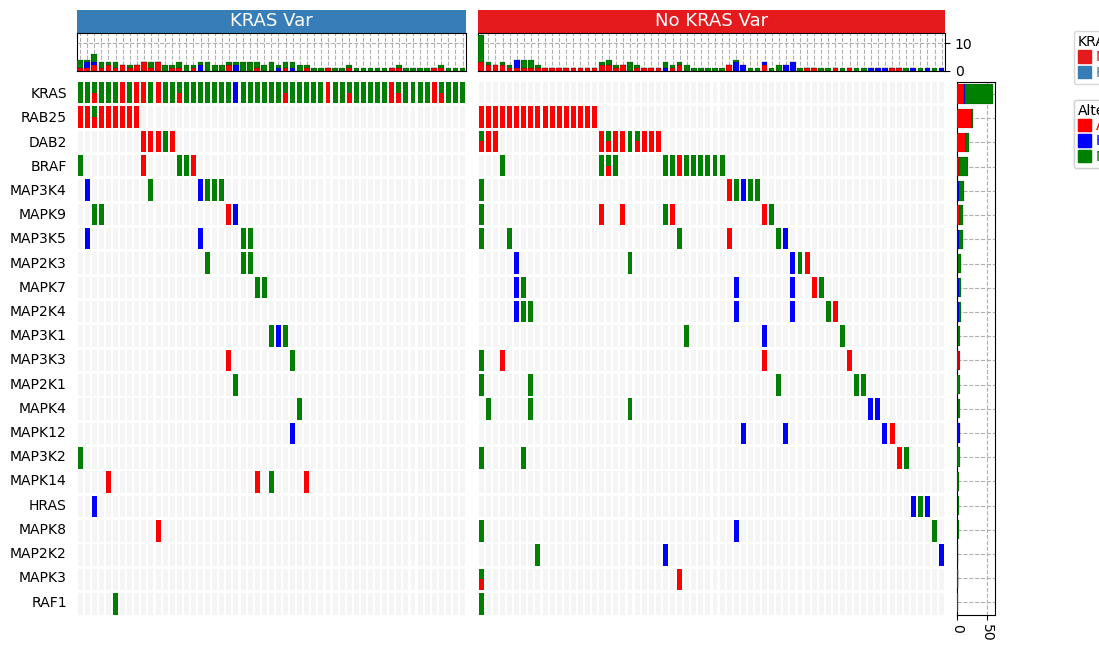

In [12]:
cols=['AMP','HOMDEL','MUT']
colors=["red","blue","#008000"]

# calculate genes (row) mutation frequencies.
row_vc=data.groupby('Genes').apply(lambda x:x.loc[:,cols].sum())
# calculate samples (cols) mutation frequencies.
col_vc=data.groupby('SampleID').apply(lambda x:x.loc[:,cols].sum())

#Samples with variants at KRAS
kras_samples=data.loc[(data.Genes=='KRAS') & (data.loc[:,cols].sum(axis=1)>0)].SampleID.unique().tolist()
df_col_split=pd.DataFrame(index=data.SampleID.unique(),data={'KRAS':['No KRAS Var']*data.SampleID.nunique()})
df_col_split.loc[kras_samples,'KRAS']='KRAS Var'

top_annotation=HeatmapAnnotation(axis=1,
                                KRAS=anno_simple(df_col_split.KRAS,add_text=True,height=6),
                                Col=anno_barplot(col_vc,colors=colors,legend=False,height=10,linewidth=0.1),
                                verbose=0, label_side='left', label_kws={'horizontalalignment': 'right','visible':False})
right_annotation = HeatmapAnnotation(axis=0,orientation='right',
                                Row=anno_barplot(row_vc,colors=colors,legend=False,height=10,linewidth=0.1),
                                verbose=0, label_side='top', label_kws={'horizontalalignment': 'left','rotation':45,'visible':False})

plt.figure(figsize=(12,8))
op=oncoPrintPlotter(data=data,y='Genes',x='SampleID',
                    values=cols,colors=colors,subplot_gap=3,label='Alteration',
                    top_annotation=top_annotation,right_annotation=right_annotation,
                    col_split=df_col_split.KRAS,col_split_order=['KRAS Var','No KRAS Var'],col_split_gap=3,
                   show_rownames=True,show_colnames=False) #xticklabels_kws={'labelsize':3}
#plt.savefig("oncoPrint.pdf",bbox_inches='tight')
plt.show()

## Complex heatmap plot

In [13]:
data=pd.read_csv("https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/data/Loyfer2023.meth.csv",sep='\t',index_col=0)
df_row=pd.read_csv("https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/data/Loyfer2023.meth.rows.csv",sep='\t',index_col=0)
df_col=pd.read_csv("https://raw.githubusercontent.com/DingWB/PyComplexHeatmap/main/data/Loyfer2023.meth.cols.csv",sep='\t',index_col=0)

In [14]:
data.head()

Adipocytes  Bladder-Epithelium  Blood-B-Mem   Blood-B  \
chr1-110426397    0.120667              0.9102       0.8285  0.918667   
chr1-110426639    0.420000              0.9304       0.8920  0.955667   
chr1-110426659    0.425667              0.9328       0.7635  0.933000   
chr1-110427109    0.203667              0.9724       0.9610  0.963667   
chr1-110427116    0.217333              0.9478       1.0000  0.976000   

                Blood-Granulocytes  Colon-Macrophages  Liver-Macrophages  \
chr1-110426397            0.750667             0.8705              0.896   
chr1-110426639            0.964667             0.9285              0.903   
chr1-110426659            0.942333             0.8945              0.931   
chr1-110427109            0.968667             0.9240              0.939   
chr1-110427116            0.970667             0.9730              0.913   

                Blood-Monocytes  Lung-Interstitial-Macrophages  \
chr1-110426397         0.916333                       0.953333   
chr1-110426639         0.924667                       0.975333   
chr1-110426659         0.963667                       0.899333   
chr1-110427109         0.985000                       0.968667   
chr1-110427116         0.975000                       0.970333   

                Lung-Alveolar-Macrophages  ...  Pancreas-Duct  \
chr1-110426397                     0.9450  ...        0.61225   
chr1-110426639                     0.9720  ...        0.94575   
chr1-110426659                     0.8895  ...        0.93875   
chr1-110427109                     0.9620  ...        0.73300   
chr1-110427116                     0.9800  ...        0.65125   

                Skeletal-Muscle  Small-int-Epithelium  Small-int-Endocrine  \
chr1-110426397           0.5485               0.94175                0.952   
chr1-110426639           0.8990               0.96225                0.963   
chr1-110426659           0.8390               0.92225                0.903   
chr1-110427109           0.7570               0.96525                0.939   
chr1-110427116           0.7955               0.96150                1.000   

                Lung-Bronchus-Smooth-Muscle  Prostate-Smooth-Muscle  \
chr1-110426397                        0.417                   0.150   
chr1-110426639                        0.606                   0.185   
chr1-110426659                        0.559                   0.129   
chr1-110427109                        0.929                   0.225   
chr1-110427116                        0.952                   0.605   

                Bladder-Smooth-Muscle  Coronary-Artery-Smooth-Muscle  \
chr1-110426397                  0.229                          0.294   
chr1-110426639                  0.348                          0.917   
chr1-110426659                  0.292                          0.875   
chr1-110427109                  0.806                          0.951   
chr1-110427116                  0.857                          1.000   

                Aorta-Smooth-Muscle  Thyroid-Epithelium  
chr1-110426397                0.214            0.938333  
chr1-110426639                0.484            0.972333  
chr1-110426659                0.395            0.989667  
chr1-110427109                0.905            0.974333  
chr1-110427116                0.868            0.981000  

[5 rows x 69 columns]

In [15]:
df_row.head()

Group
ID                        
chr1-110426397  Adipocytes
chr1-110426639  Adipocytes
chr1-110426659  Adipocytes
chr1-110427109  Adipocytes
chr1-110427116  Adipocytes

In [16]:
df_col.Group.unique()

array(['Adipocytes', 'Bladder-Ep', 'Blood-B', 'Blood-Granul',
       'Blood-Mono+Macro', 'Blood-NK', 'Blood-T', 'Bone-Osteob',
       'Breast-Basal-Ep', 'Breast-Luminal-Ep', 'Colon-Ep', 'Dermal-Fibro',
       'Epid-Kerat', 'Eryth-prog', 'Fallopian-Ep', 'Gallbladder',
       'Gastric-Ep', 'Head-Neck-Ep', 'Heart-Cardio', 'Heart-Fibro',
       'Kidney-Ep', 'Liver-Hep', 'Lung-Ep-Alveo', 'Lung-Ep-Bron',
       'Neuron', 'Oligodend', 'Pancreas-Acinar', 'Pancreas-Beta',
       'Pancreas-Delta', 'Pancreas-Duct', 'Skeletal-Musc', 'Small-Int-Ep',
       'Smooth-Musc', 'Thyroid-Ep'], dtype=object)

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..


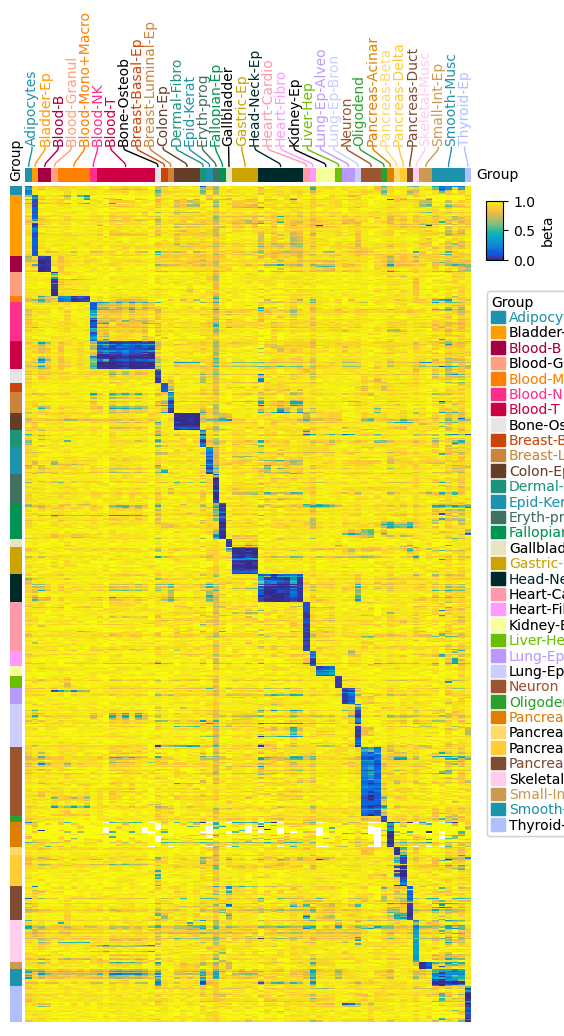

In [17]:
col_colors_dict={
                'Adipocytes':'#1E93AE','Bladder-Ep':'#FF9C00','Blood-B':'#A40043','Blood-Granul':'#FF9F7F',
                'Blood-Mono+Macro':'#FF7F00','Blood-NK':'#FF2E8D','Blood-T':'#CC0043','Bone-Osteob':'#E5E5E5',
                'Breast-Basal-Ep':'#CC4407','Breast-Luminal-Ep':'#CC843D','Colon-Ep':'#663D28','Dermal-Fibro':'#1E937C',
                'Epid-Kerat':'#1E93AE','Eryth-prog':'#40705F','Fallopian-Ep':'#009351','Gallbladder':'#E7E4BF',
                'Gastric-Ep':'#CCA300','Head-Neck-Ep':'#002929','Heart-Cardio':'#FF99AA','Heart-Fibro':'#FF99FF',
                'Kidney-Ep':'#F6FF99','Liver-Hep':'#6CBF00','Lung-Ep-Alveo':'#BA99FF','Lung-Ep-Bron':'#CCCCFF',
                'Neuron':'#9e542e','Oligodend':'#2ca02c','Pancreas-Acinar':'#DF7F00','Pancreas-Beta':'#FFD866',
                'Pancreas-Delta':'#FFCC32','Pancreas-Duct':'#7F4C33','Skeletal-Musc':'#FFCCEE','Small-Int-Ep':'#CC9951',
                'Smooth-Musc':'#1E93AE','Thyroid-Ep':'#B2BFFF'}

col_ha = HeatmapAnnotation(label=anno_label(df_col['Group'],merge=True,rotation=90,extend=True,
                                            colors=col_colors_dict,adjust_color=True,luminance=0.75,
                                            relpos=(0.5,0)), #fontsize=10
                           Group=anno_simple(df_col['Group'],colors=col_colors_dict),
                           verbose=0,axis=1)
row_ha = HeatmapAnnotation(
                           Group=anno_simple(df_row['Group'],legend=True,
                                             colors=col_ha.annotations[1].color_dict),
                           verbose=0,axis=0,plot_legend=False) #label_kws={'rotation':90,'rotation_mode':'anchor','color':'black'}

plt.figure(figsize=(6, 10))
cm = ClusterMapPlotter(data=data.loc[df_row.index.tolist(),df_col.index.tolist()],
                       top_annotation=col_ha, left_annotation=row_ha,
                       row_cluster=False,col_cluster=False,
                       label='beta', row_dendrogram=False,legend_gap=7,
                       cmap='parula',rasterized=True)
#plt.savefig("Loyfer2023_heatmap.pdf",bbox_inches='tight')
plt.show()

## dotCluster map of methylation data

In [18]:
df_corr = pd.read_csv("PyComplexHeatmap/data/kycg_modules_correlations.csv",sep='\t',index_col=0)
df_ann = pd.read_csv("PyComplexHeatmap/data/kycg_modules_annotations.csv",sep='\t')
betas = pd.read_csv("PyComplexHeatmap/data/kycg_modules_betas.csv",sep='\t')
cpg_std=betas.std().to_dict()
cpg_mean=betas.mean().to_dict()
df_ann.set_index('CpG',inplace=True)
df_ann.Module=df_ann.Module.astype(str)

In [19]:
df_ann.Module.value_counts().head(5)

4    45
1    30
3    28
9    17
2    17
Name: Module, dtype: int64

In [20]:
df_ann.loc[df_ann.Module.isin(['4','1','3','9','2','39','37'])].HM.unique()

array(['H3K4me1;H3K79me2;H3K79me3', 'H3F3A;H4K20me1', nan,
       'H2BK20ac;H3K4me1', 'H3F3A;H3K23me2', 'H2BK20ac', 'H2AFY', 'H3F3A',
       'H4K20me1', 'H2AK9ac;H2BK12ac;H2BK15ac;H2BK20ac;H3K9me1',
       'H3K9me1', 'H3K23me2', 'H2BK120ub', 'H2BK12ac', 'H2AZac;H3K79me1',
       'H2A;H2AZac;H3_4ac;H3K27me1;H3K4me3B;H3K56ac;H3K79me1;H3K9ac_H3K14ac;H3K9K14ac',
       'CENPA;H1.0;H1.4;H2A;H2AFZ;H2AK119;H2AK9ac;H2AZac;H3.3;H3.3,H2A.Z;H3ac;H3K27ac;H3K27me1;H3K4me3;H3K4me3B;H3K79me1;H3K9ac;H3K9ac_H3K14ac;H3K9K14ac;H4;H4ac;H4K5ac;H4K5ac_H4K8ac_H4K12ac_H4K16ac;H4K8ac;HistoneLysineAcetylation;HistoneLysineCrotonylation',
       'H1.0',
       'H3K18cr;H4K16ac;HistoneLysineAcetylation;HistoneLysineCrotonylation',
       'H4K12ac', 'H1.4', 'H4K5ac_H4K8ac_H4K12ac_H4K16ac',
       'H1.4;H3K79me1;H4ac;H4K12ac;H4K5ac_H4K8ac_H4K12ac_H4K16ac',
       'H3K23me2;H3K27me3B', 'H4', 'H1.4;H3K79me1',
       'H2AZac;H3;H3K4me3;H3K4me3B;H3K79me1;H4K5ac;H4K5ac_H4K8ac_H4K12ac_H4K16ac',
       'H2AK9ac;H3K79me1;H

In [21]:
df_corr.head()

cg04735237  cg00643814  cg24865495  cg25376651  cg27485084  \
cg04735237    1.000000    0.559916    0.686845    0.561415    0.699960   
cg00643814    0.559916    1.000000    0.538034    0.568960    0.687787   
cg24865495    0.686845    0.538034    1.000000    0.614696    0.646452   
cg25376651    0.561415    0.568960    0.614696    1.000000    0.564983   
cg27485084    0.699960    0.687787    0.646452    0.564983    1.000000   

            cg12609052  cg07354679  cg02592525  cg12747056  cg17718960  ...  \
cg04735237    0.711086    0.563690    0.527953    0.621757    0.623319  ...   
cg00643814    0.593650    0.676068    0.606604    0.589549    0.747987  ...   
cg24865495    0.786480    0.602911    0.519926    0.642344    0.642081  ...   
cg25376651    0.727579    0.624186    0.416198    0.505130    0.596338  ...   
cg27485084    0.655515    0.599935    0.590981    0.627786    0.674095  ...   

            cg19987665  cg18406033  cg09678971  cg00461612  cg18689454  \
cg04735237    0.048462    0.103904   -0.002533    0.074093   -0.114526   
cg00643814   -0.185989   -0.087952   -0.242909   -0.065101   -0.054958   
cg24865495    0.022499    0.108524   -0.015151    0.028957   -0.274560   
cg25376651   -0.030346    0.122412   -0.063630   -0.007048   -0.197339   
cg27485084   -0.020895    0.058742   -0.078318    0.055019   -0.139691   

            cg11923631  cg27251412  cg08089567  cg16717549  cg09510531  
cg04735237   -0.151763   -0.140823   -0.117356   -0.100510   -0.126291  
cg00643814   -0.096098   -0.089246   -0.078234   -0.025965   -0.069120  
cg24865495   -0.302464   -0.284823   -0.265835   -0.262931   -0.268134  
cg25376651   -0.226034   -0.218230   -0.180297   -0.181867   -0.204431  
cg27485084   -0.168351   -0.160081   -0.142216   -0.114554   -0.144024  

[5 rows x 512 columns]

In [22]:
df_ann.head()

Module ChromHMM ChromHMM_bioc                         HM  \
CpG                                                                   
cg04735237      1     TxWk          TxWk  H3K4me1;H3K79me2;H3K79me3   
cg00643814      1    Quies         Quies             H3F3A;H4K20me1   
cg24865495      1    Quies         Quies                        NaN   
cg25376651      1    Quies         Quies           H2BK20ac;H3K4me1   
cg27485084      1    Quies         Quies             H3F3A;H3K23me2   

                                                         TFBS    genes  
CpG                                                                     
cg04735237                                 HDGF;RBFOX2;SREBF1    PQBP1  
cg00643814  ASCL1;CASZ1;EBF1;FEZF1;FOXM1;HAND2;HDAC3;IRF2B...      NaN  
cg24865495                CRX;DNMT3B;OTX2;RORB;ZMYND11;ZNF711  MACROD1  
cg25376651  ATF2;BATF;ETV6;FOS;IKZF2;IRF4;JUNB;MAF;MAFG;ME...      FRY  
cg27485084                                               PDX1      NaN

In [23]:
df_ann=df_ann.loc[df_ann.Module.isin(['4','1','3','9','2','39'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]
df_ann['Std']=df_ann.index.to_series().map(cpg_std)
df_ann['Mean']=df_ann.index.to_series().map(cpg_mean)
data=df_corr.stack().reset_index()
data.columns=['X','Y','Correlation']
data['Module']=data.X.map(df_ann.Module.to_dict())
data['ChromHMM']=data.X.map(df_ann.ChromHMM.to_dict())
keep_hm=['H3K4me1','H3K4me3','H3K27me1','H3K27me3','H3K27me3B']
for hm in keep_hm:
    df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
    data[hm]=data.X.map(df_ann[hm].to_dict())


In [24]:
print(df_ann.shape)
df_ann.head()

(154, 13)


Module ChromHMM ChromHMM_bioc                         HM  \
CpG                                                                   
cg04735237      1     TxWk          TxWk  H3K4me1;H3K79me2;H3K79me3   
cg00643814      1    Quies         Quies             H3F3A;H4K20me1   
cg24865495      1    Quies         Quies                        NaN   
cg25376651      1    Quies         Quies           H2BK20ac;H3K4me1   
cg27485084      1    Quies         Quies             H3F3A;H3K23me2   

                                                         TFBS    genes  \
CpG                                                                      
cg04735237                                 HDGF;RBFOX2;SREBF1    PQBP1   
cg00643814  ASCL1;CASZ1;EBF1;FEZF1;FOXM1;HAND2;HDAC3;IRF2B...      NaN   
cg24865495                CRX;DNMT3B;OTX2;RORB;ZMYND11;ZNF711  MACROD1   
cg25376651  ATF2;BATF;ETV6;FOS;IKZF2;IRF4;JUNB;MAF;MAFG;ME...      FRY   
cg27485084                                               PDX1      NaN   

                 Std      Mean  H3K4me1  H3K4me3  H3K27me1  H3K27me3  \
CpG                                                                    
cg04735237  0.245870  0.768918        1        0         0         0   
cg00643814  0.319166  0.635635        0        0         0         0   
cg24865495  0.270459  0.835897        0        0         0         0   
cg25376651  0.276320  0.618949        1        0         0         0   
cg27485084  0.276748  0.700196        0        0         0         0   

            H3K27me3B  
CpG                    
cg04735237          0  
cg00643814          0  
cg24865495          0  
cg25376651          0  
cg27485084          0

In [25]:
print(data.shape)
data.head()

(23716, 10)


X           Y  Correlation Module ChromHMM  H3K4me1  H3K4me3  \
0  cg04735237  cg04735237     1.000000      1     TxWk        1        0   
1  cg04735237  cg00643814     0.559916      1     TxWk        1        0   
2  cg04735237  cg24865495     0.686845      1     TxWk        1        0   
3  cg04735237  cg25376651     0.561415      1     TxWk        1        0   
4  cg04735237  cg27485084     0.699960      1     TxWk        1        0   

   H3K27me1  H3K27me3  H3K27me3B  
0         0         0          0  
1         0         0          0  
2         0         0          0  
3         0         0          0  
4         0         0          0

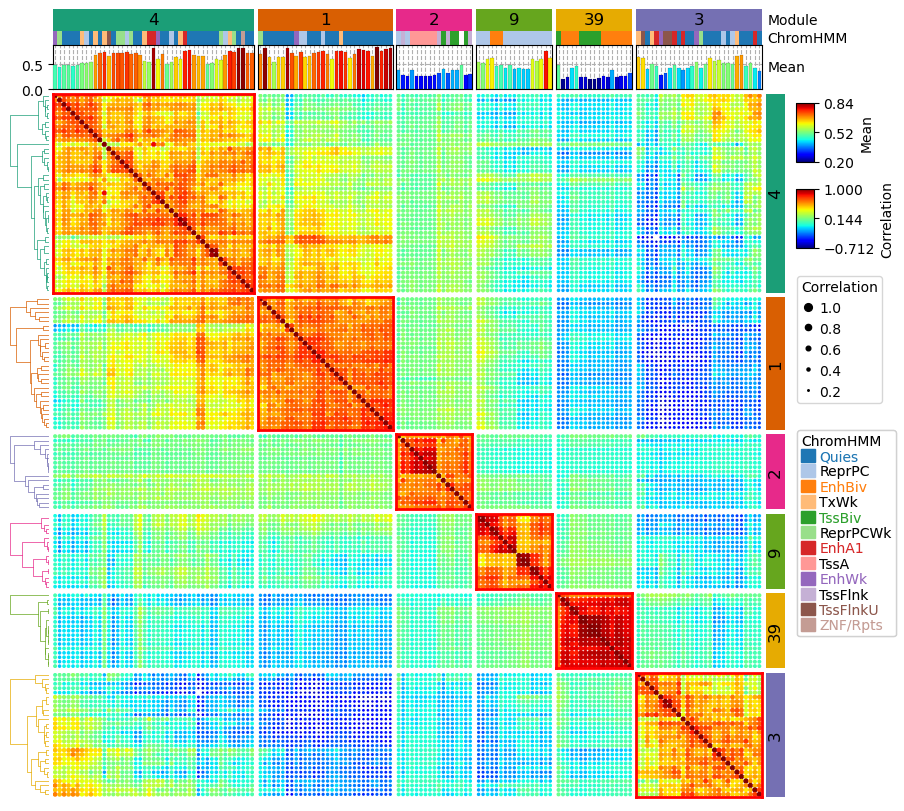

In [26]:
row_ha = HeatmapAnnotation(Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           axis=0,verbose=0,label_kws={'visible':False})

all_cmaps=matplotlib.pyplot.colormaps()
if 'binarize' not in all_cmaps:
    c = LinearSegmentedColormap.from_list('binarize', [(0, 'lightgray'), (1, 'black')])
    plt.register_cmap(cmap=c)

col_ha = HeatmapAnnotation(#label=anno_label(df_col.ColGroup, merge=True,rotation=45),
                           Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           ChromHMM=anno_simple(df_ann.ChromHMM,cmap='tab20'),
                           Mean=anno_barplot(df_ann.Mean,cmap='jet',linewidth=0.1),
                           # H3K4me1=anno_simple(df_ann.H3K4me1,cmap='binarize',legend=False),
                           # H3K4me3=anno_simple(df_ann.H3K4me3,cmap='binarize',legend=False),
                           # H3K27me1=anno_simple(df_ann.H3K27me1,cmap='binarize',legend=False),
                           # H3K27me3=anno_simple(df_ann.H3K27me3,cmap='binarize',legend=False),
                           # H3K27me3B=anno_simple(df_ann.H3K27me3B,cmap='binarize',legend=False),
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

plt.figure(figsize=(10, 9))
cm = DotClustermapPlotter(data=data, x='X',y='Y',value='Correlation',c='Correlation',s='Correlation',
                          hue='Module', cmap='jet',#cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
                          #colors={'High':'red','Middle':'purple','Low':'green'},
                          #marker={'4':'P','1':'*','3':'D'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_ann.Module,row_split=df_ann.Module, col_split_gap=1,row_split_gap=1,
                          row_dendrogram=True,legend_anchor="ax_heatmap",legend_hpad=7,legend_vpad=5,
                          tree_kws={'row_cmap':'Dark2'},verbose=0,legend_gap=7,alpha=2,spines=False)
# plot custom spines
for i in range(cm.heatmap_axes.shape[0]):
    for j in range(cm.heatmap_axes.shape[1]):
        if i != j:
            continue
        ax = cm.heatmap_axes[i][j]
        for side in ["top", "right", "left", "bottom"]:
            ax.spines[side].set_visible(True)
            ax.spines[side].set_color('red')
            ax.spines[side].set_linewidth(2)
#plt.savefig("dotClustermap.pdf", bbox_inches='tight')
plt.show()

In [27]:
df_ann=df_ann.loc[df_ann.Module.isin(['4','1','3'])]
keep_cpgs=df_ann.index.tolist()
df_corr=df_corr.loc[keep_cpgs,keep_cpgs]
data=df_corr.stack().reset_index()
data.columns=['X','Y','Correlation']
data['Module']=data.X.map(df_ann.Module.to_dict())
data['ChromHMM']=data.X.map(df_ann.ChromHMM.to_dict())
keep_hm=['H3K4me1','H3K4me3','H3K27me1','H3K27me3B']
for hm in keep_hm:
    df_ann[hm]=df_ann.HM.fillna('').apply(lambda x:1 if hm in x.split(';') else 0)
    data[hm]=data.X.map(df_ann[hm].to_dict())

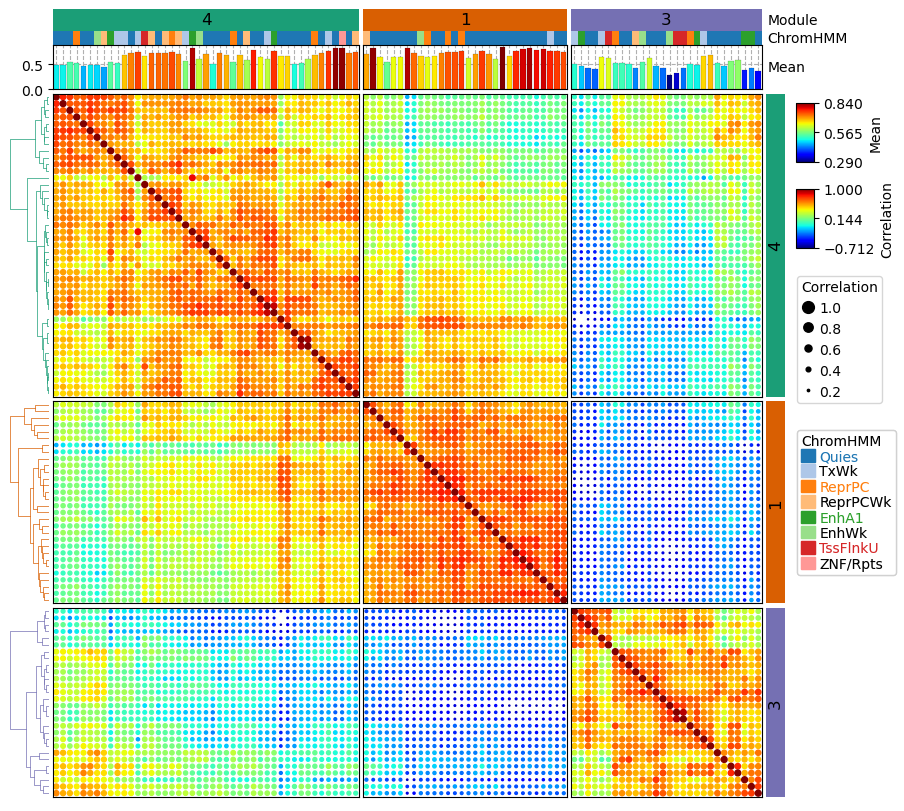

In [28]:
row_ha = HeatmapAnnotation(Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           axis=0,verbose=0,label_kws={'visible':False})

all_cmaps=matplotlib.pyplot.colormaps()
if 'binarize' not in all_cmaps:
    c = LinearSegmentedColormap.from_list('binarize', [(0, 'lightgray'), (1, 'black')])
    plt.register_cmap(cmap=c)

col_ha = HeatmapAnnotation(#label=anno_label(df_col.ColGroup, merge=True,rotation=45),
                           Module=anno_simple(df_ann.Module,cmap='Dark2',legend=False,height=5,
                                              add_text=True,text_kws={'color':'black','fontsize':12}),
                           ChromHMM=anno_simple(df_ann.ChromHMM,cmap='tab20'),
                           Mean=anno_barplot(df_ann.Mean,cmap='jet',linewidth=0.1),
                           # H3K27me3=anno_simple(df_ann.H3K27me3,cmap='binarize',legend=False),
                           # H3K27me3B=anno_simple(df_ann.H3K27me3B,cmap='binarize',legend=False),
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

plt.figure(figsize=(10, 9))
cm = DotClustermapPlotter(data=data, x='X',y='Y',value='Correlation',c='Correlation',s='Correlation',
                          hue='Module', cmap='jet',#cmap={'High':'Reds','Middle':'Purples','Low':'Greens'},
                          #colors={'High':'red','Middle':'purple','Low':'green'},
                          #marker={'4':'P','1':'*','3':'D'},
                          top_annotation=col_ha,right_annotation=row_ha,
                          col_split=df_ann.Module,row_split=df_ann.Module, col_split_gap=1,row_split_gap=1,
                          row_dendrogram=True,legend_anchor="ax_heatmap",legend_hpad=7,legend_vpad=5,
                          tree_kws={'row_cmap':'Dark2'},verbose=0,legend_gap=7,alpha=2,spines=True)
#plt.savefig("dotClustermap2.pdf", bbox_inches='tight')
plt.show()

# Circlize plot in Python [pyCirclize]

## Circlize plot

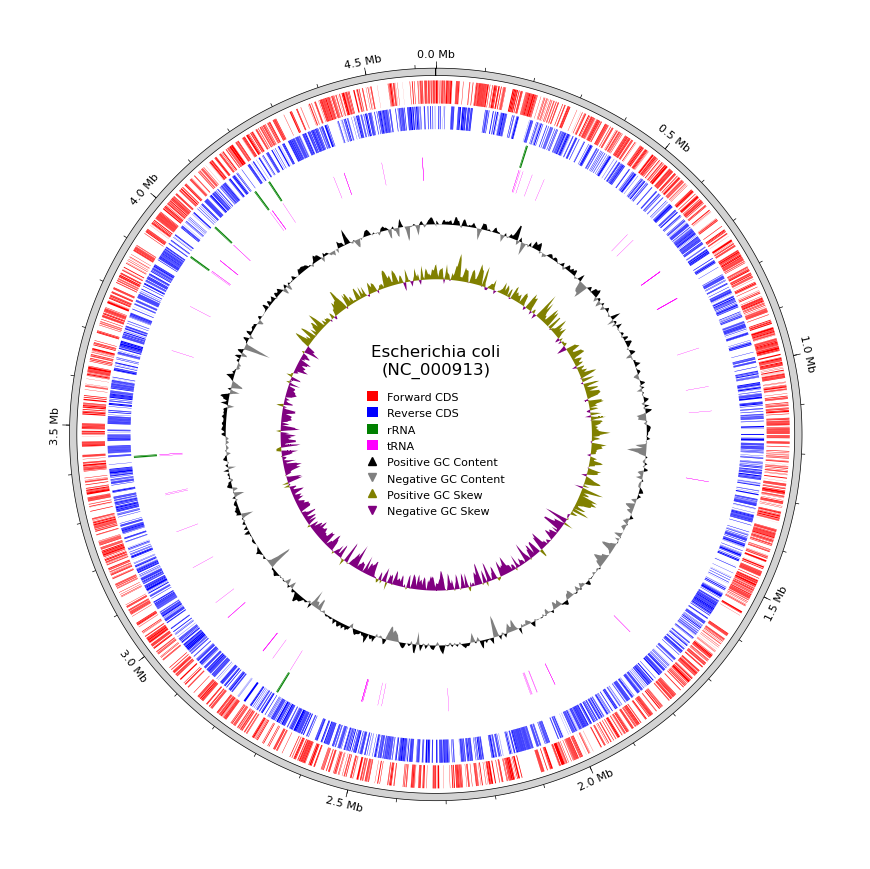

In [29]:
from pycirclize import Circos
from pycirclize.parser import Genbank
from pycirclize.utils import load_prokaryote_example_file
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Load Genbank file
gbk_file = load_prokaryote_example_file("escherichia_coli.gbk.gz")
gbk = Genbank(gbk_file)

circos = Circos(sectors={gbk.name: gbk.range_size})
circos.text("Escherichia coli\n(NC_000913)", size=12, r=20)
sector = circos.get_sector(gbk.name)

# Plot outer track with xticks
major_ticks_interval = 500000
minor_ticks_interval = 100000
outer_track = sector.add_track((98, 100))
outer_track.axis(fc="lightgrey")
outer_track.xticks_by_interval(
    major_ticks_interval, label_formatter=lambda v: f"{v/ 10 ** 6:.1f} Mb"
)
outer_track.xticks_by_interval(minor_ticks_interval, tick_length=1, show_label=False)

# Plot Forward CDS, Reverse CDS, rRNA, tRNA
f_cds_track = sector.add_track((90, 97), r_pad_ratio=0.1)
f_cds_track.genomic_features(gbk.extract_features("CDS", target_strand=1), fc="red")

r_cds_track = sector.add_track((83, 90), r_pad_ratio=0.1)
r_cds_track.genomic_features(gbk.extract_features("CDS", target_strand=-1), fc="blue")

rrna_track = sector.add_track((76, 83), r_pad_ratio=0.1)
rrna_track.genomic_features(gbk.extract_features("rRNA"), fc="green")

trna_track = sector.add_track((69, 76), r_pad_ratio=0.1)
trna_track.genomic_features(gbk.extract_features("tRNA"), color="magenta", lw=0.1)

# Plot GC content
gc_content_track = sector.add_track((50, 65))

pos_list, gc_contents = gbk.calc_gc_content()
gc_contents = gc_contents - gbk.calc_genome_gc_content()
positive_gc_contents = np.where(gc_contents > 0, gc_contents, 0)
negative_gc_contents = np.where(gc_contents < 0, gc_contents, 0)
abs_max_gc_content = np.max(np.abs(gc_contents))
vmin, vmax = -abs_max_gc_content, abs_max_gc_content
gc_content_track.fill_between(
    pos_list, positive_gc_contents, 0, vmin=vmin, vmax=vmax, color="black"
)
gc_content_track.fill_between(
    pos_list, negative_gc_contents, 0, vmin=vmin, vmax=vmax, color="grey"
)

# Plot GC skew
gc_skew_track = sector.add_track((35, 50))

pos_list, gc_skews = gbk.calc_gc_skew()
positive_gc_skews = np.where(gc_skews > 0, gc_skews, 0)
negative_gc_skews = np.where(gc_skews < 0, gc_skews, 0)
abs_max_gc_skew = np.max(np.abs(gc_skews))
vmin, vmax = -abs_max_gc_skew, abs_max_gc_skew
gc_skew_track.fill_between(
    pos_list, positive_gc_skews, 0, vmin=vmin, vmax=vmax, color="olive"
)
gc_skew_track.fill_between(
    pos_list, negative_gc_skews, 0, vmin=vmin, vmax=vmax, color="purple"
)

fig = circos.plotfig()

# Add legend
handles = [
    Patch(color="red", label="Forward CDS"),
    Patch(color="blue", label="Reverse CDS"),
    Patch(color="green", label="rRNA"),
    Patch(color="magenta", label="tRNA"),
    Line2D([], [], color="black", label="Positive GC Content", marker="^", ms=6, ls="None"),
    Line2D([], [], color="grey", label="Negative GC Content", marker="v", ms=6, ls="None"),
    Line2D([], [], color="olive", label="Positive GC Skew", marker="^", ms=6, ls="None"),
    Line2D([], [], color="purple", label="Negative GC Skew", marker="v", ms=6, ls="None"),
]
_ = circos.ax.legend(handles=handles, bbox_to_anchor=(0.5, 0.475), loc="center", fontsize=8)


## Ideogram plot

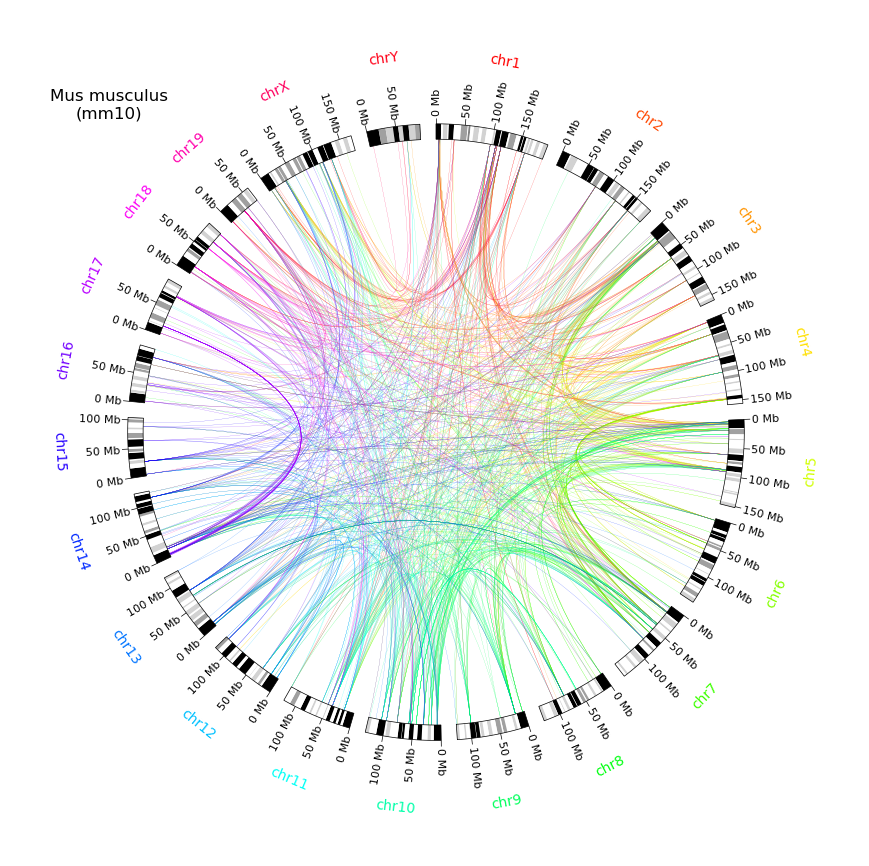

In [30]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/mm10)
chr_bed_file, cytoband_file, chr_links = load_eukaryote_example_dataset("mm10")

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file, space=3)
circos.text("Mus musculus\n(mm10)", deg=315, r=150, size=12)

# Add cytoband tracks from cytoband file
circos.add_cytoband_tracks((95, 100), cytoband_file)

# Create chromosome color mapping
ColorCycler.set_cmap("hsv") 
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# Plot chromosome name & xticks
for sector in circos.sectors:
    sector.text(sector.name, r=120, size=10, color=chr_name2color[sector.name])
    sector.get_track("cytoband").xticks_by_interval(
        50000000,
        label_size=8,
        label_orientation="vertical",
        label_formatter=lambda v: f"{v / 1000000:.0f} Mb",
    )

# Plot chromosome link
for link in chr_links:
    region1 = (link.query_chr, link.query_start, link.query_end)
    region2 = (link.ref_chr, link.ref_start, link.ref_end)
    color = chr_name2color[link.query_chr]
    if link.query_chr != link.ref_chr:
        circos.link(region1, region2, color=color)

fig = circos.plotfig()

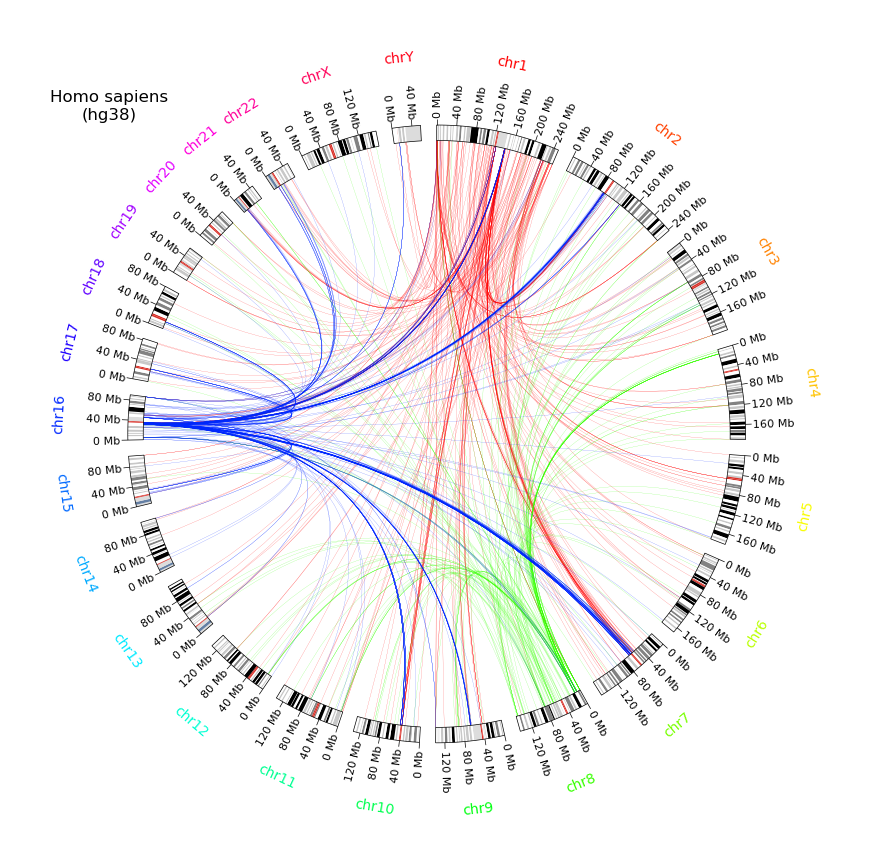

In [31]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file, cytoband_file, chr_links = load_eukaryote_example_dataset("hg38")

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file, space=3)
circos.text("Homo sapiens\n(hg38)", deg=315, r=150, size=12)

# Add cytoband tracks from cytoband file
circos.add_cytoband_tracks((95, 100), cytoband_file)

# Create chromosome color mapping
ColorCycler.set_cmap("hsv") 
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# Plot chromosome name & xticks
for sector in circos.sectors:
    sector.text(sector.name, r=120, size=10, color=chr_name2color[sector.name])
    sector.get_track("cytoband").xticks_by_interval(
        40000000,
        label_size=8,
        label_orientation="vertical",
        label_formatter=lambda v: f"{v / 1000000:.0f} Mb",
    )

# Plot chromosome link
for link in chr_links:
    region1 = (link.query_chr, link.query_start, link.query_end)
    region2 = (link.ref_chr, link.ref_start, link.ref_end)
    color = chr_name2color[link.query_chr]
    if link.query_chr in ("chr1", "chr8", "chr16") and link.query_chr != link.ref_chr:
        circos.link(region1, region2, color=color)

fig = circos.plotfig()

# Altair based plot

In [32]:
import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

alt.Chart(...)

# Volcano plot

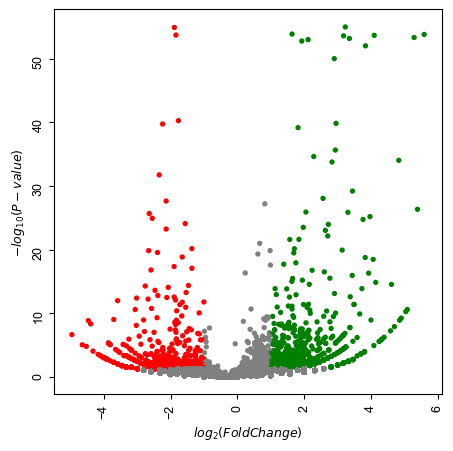

In [ ]:
from bioinfokit import analys, visuz
# load dataset as pandas dataframe
df = analys.get_data('volcano').data
df.head(30)

visuz.GeneExpression.volcano(df=df, genenames='GeneNames',lfc='log2FC', pv='p-value', show=True)

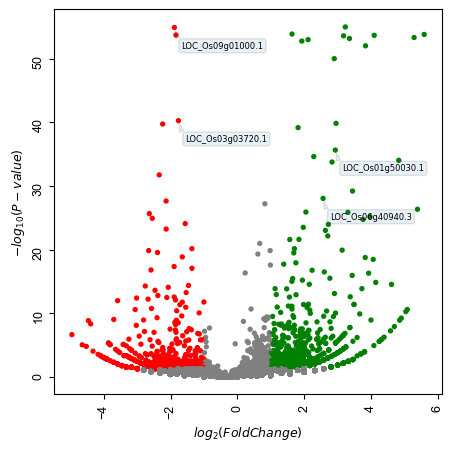

In [4]:
visuz.GeneExpression.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames",
    genenames=("LOC_Os09g01000.1", "LOC_Os01g50030.1", "LOC_Os06g40940.3", "LOC_Os03g03720.1"), gstyle=2, show=True )

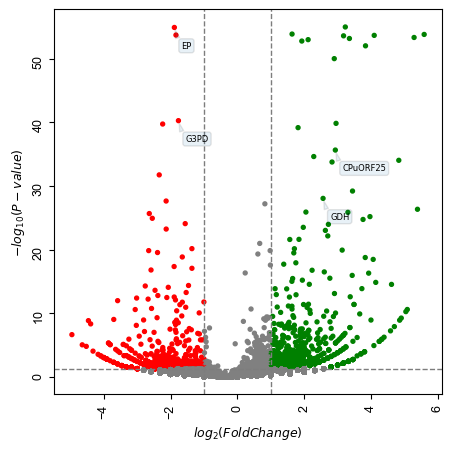

In [5]:
visuz.GeneExpression.volcano(df=df, lfc="log2FC", pv="p-value", geneid="GeneNames", 
    genenames=({"LOC_Os09g01000.1":"EP", "LOC_Os01g50030.1":"CPuORF25", "LOC_Os06g40940.3":"GDH", "LOC_Os03g03720.1":"G3PD"}),
    gstyle=2, sign_line=True, show=True)